# 주성분 분석

## 차원과 차원 축소

예를 들어 과일 사진 : 10,000개의 픽셀 : 10,000개의 특성 : 10,000개의 차원

이 차원을 줄인다 : 저장공간을 크게 절약한다.

**차원 축소** 알고리즘 : 비지도 학습 작업 중 하나

특성이 많으면 선형 모델의 성능이 높아지고, 훈련 데이터에 쉽게 과대적합된다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터의 키기를 줄이고 성능의 향상을 꾀하는 것.  
또한, 줄어든 차원에서 다시 원본으로 손실을 최대한 줄이며 복구도 가능.  
이번에는 대표적인 차원 축소 알고리즘인 **주성분 분석**, 영어로 **PCA**에 대해 알아볼 것.

## PCA 클래스

In [1]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수
    # 한 줄에 10개의 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수이다. 그렇지 않으면 10으로 설정한다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

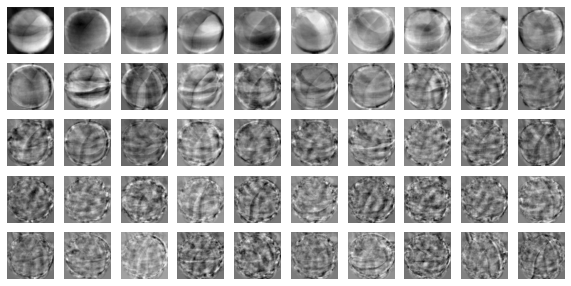

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터의 재구성

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


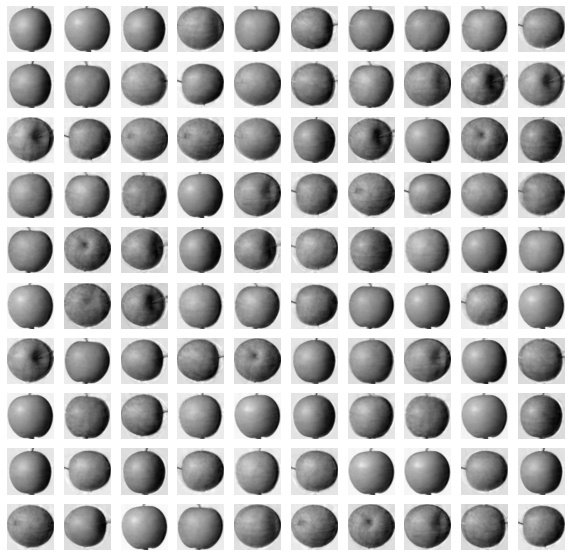

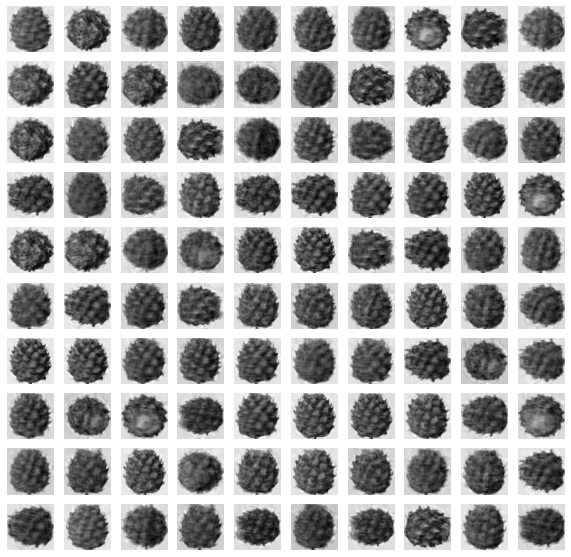

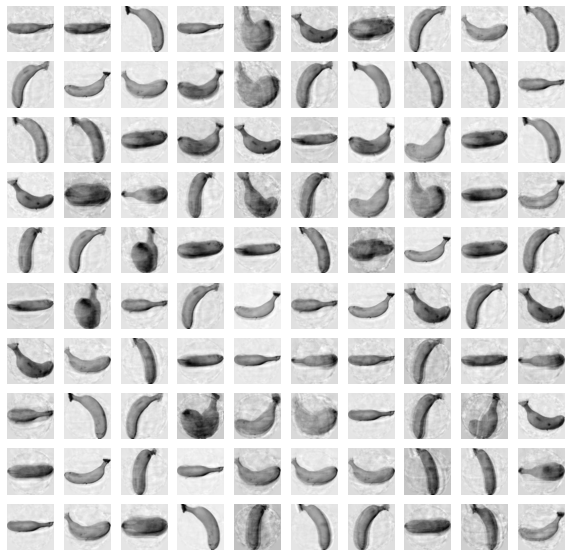

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산(explained variance)라 한다.  
`PCA` 클래스의 `explained_variance_ratio_`에 각 주성분의 설명된 분산 비율이 기록되어 있다.  
당연히 첫 번째 주성분의 설명된 분산이 가장 큼.  
이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음.

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9214964506893927


92%가 넘는 분산을 유지하고 있음.  

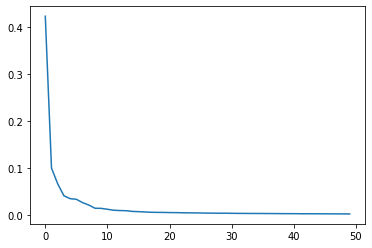

In [11]:
plt.plot(pca.explained_variance_ratio_)

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하는 중.

## 다른 알고리즘과 함께 사용하기

3개의 과일 사진을 분류해야 하니, 간단히 로지스틱 회귀 모델을 사용.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [13]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [14]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6322391510009766


In [15]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.013335132598876953


In [16]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
print(pca.n_components_)

2


In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.022525453567504884


/home/limdongyoung0/.pyenv/versions/3.9.7/envs/ml-study/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/limdongyoung0/.pyenv/versions/3.9.7/envs/ml-study/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


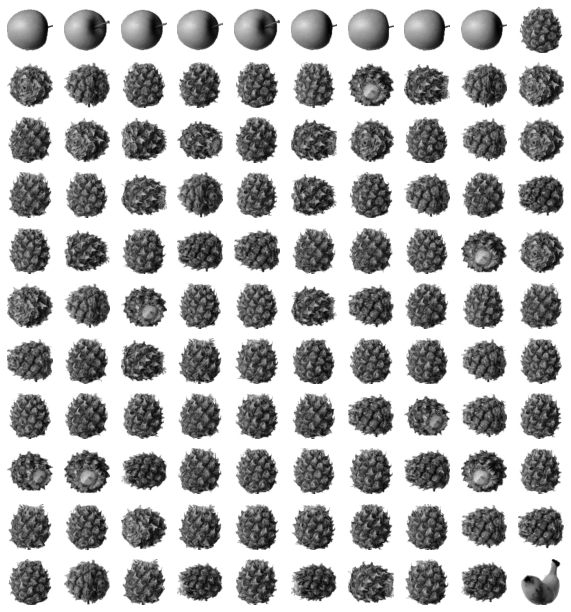

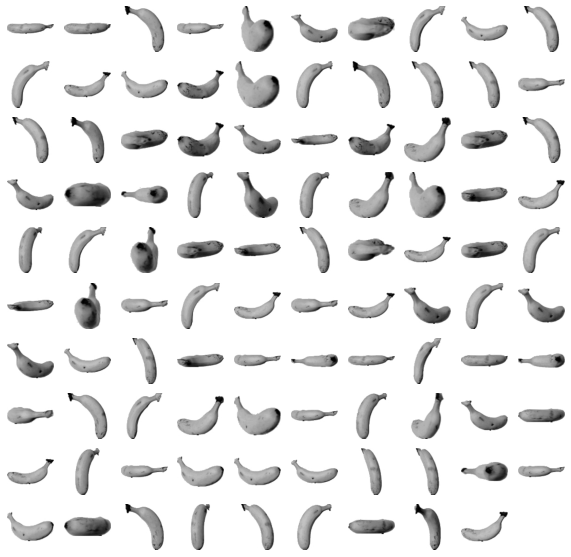

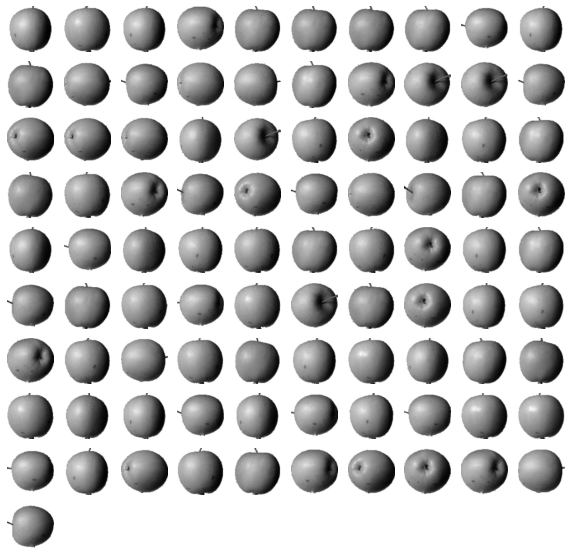

In [21]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

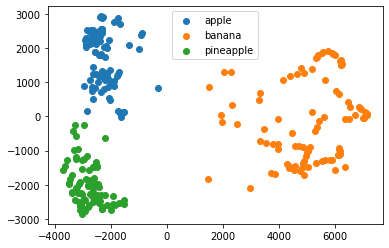

In [22]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()